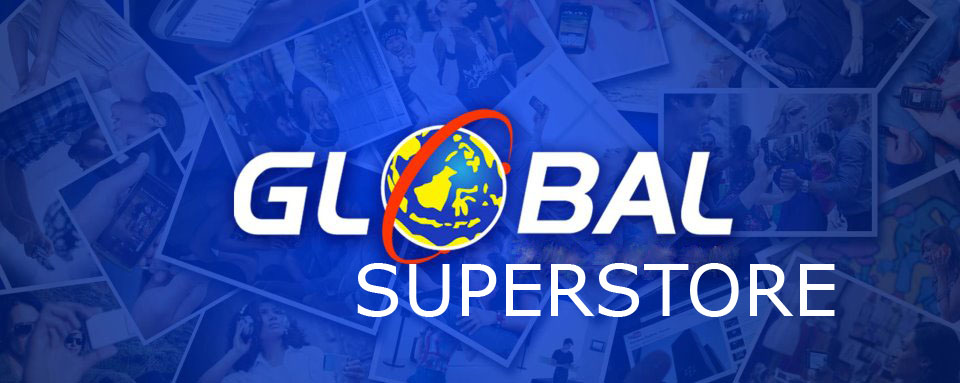

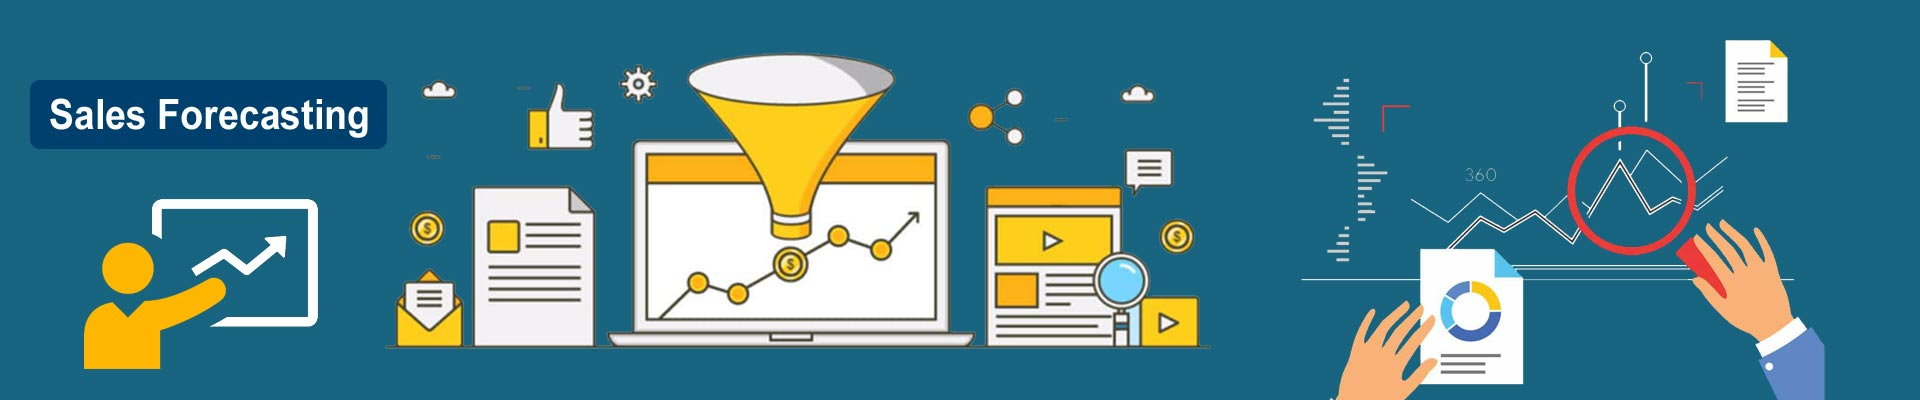

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load & Read the Data

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\data-for-time-series\\Global-Superstore_TS.csv')
df.head()

,Order Date,Segment,Market,Sales,Profit
0,2014-11-11,Consumer,USCA,221.980,62.1544
1,2014-02-05,Corporate,Asia Pacific,3709.395,-288.7650
2,2014-10-17,Consumer,Asia Pacific,5175.171,919.9710
3,2014-01-28,Home Office,Europe,2892.510,-96.5400
4,2014-11-05,Consumer,Africa,2832.960,311.5200


In [3]:
#columns
df.columns

Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit'], dtype='object')

In [4]:
#shape of data set
df.shape

(51290, 5)

In [5]:
#size of data set
df.size

256450

In [6]:
#data types of column
df.dtypes

Order Date     object
Segment        object
Market         object
Sales         float64
Profit        float64
dtype: object

In [7]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [8]:
# statisctical measures of numerical column
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [9]:
#statistical measures if categorical column
df.describe(include='O')

,Order Date,Segment,Market
count,51290,51290,51290
unique,1430,3,5
top,2015-06-18,Consumer,Asia Pacific
freq,135,26518,14302


Here Data type of Order Date column is Object, need to change it to DateTime data type

In [10]:
# Converting the Order Date to month-Year format
df['Order Date']=pd.to_datetime(df['Order Date']).dt.to_period('m') 
df.head()

,Order Date,Segment,Market,Sales,Profit
0,2014-11,Consumer,USCA,221.980,62.1544
1,2014-02,Corporate,Asia Pacific,3709.395,-288.7650
2,2014-10,Consumer,Asia Pacific,5175.171,919.9710
3,2014-01,Home Office,Europe,2892.510,-96.5400
4,2014-11,Consumer,Africa,2832.960,311.5200


### Exploratory Data Analysis

#### Missing Value Check

In [11]:
df.isna().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

No missing values in the data.

#### Outliers Treatment

In [12]:
df.describe(percentiles=[.05,.25,.50,.80,.90,.95,.99])

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
5%,8.800000,-83.904750
25%,30.758625,0.000000
50%,85.053000,9.240000
80%,327.895200,50.727200
90%,632.225736,112.680000
95%,1015.955640,211.500000


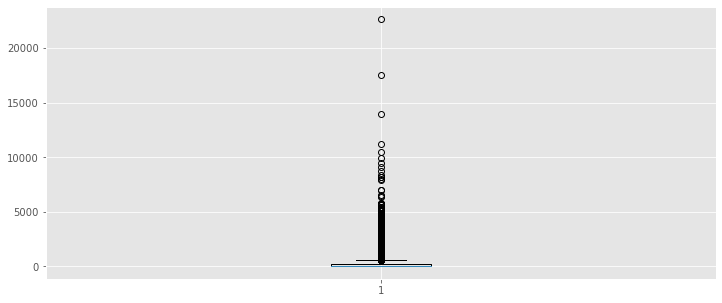

In [13]:
#to have better understing use box plot
plt.figure(figsize=(12,5))
plt.boxplot(x='Sales', data=df);

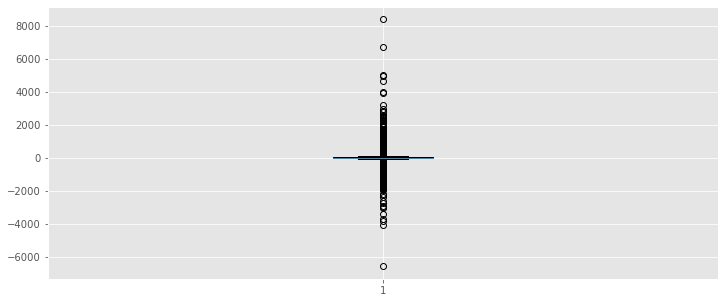

In [14]:
plt.figure(figsize=(12,5))
plt.boxplot(x='Profit', data=df);

We can clearly see the outliers in both Sales & Profit Column, but here we cannot treat them, because in time series forecasting deleting any data points leads to discontinuity.

### Which Mrket place has most Demand?

Text(0.5, 1.0, 'Different Market Places ')

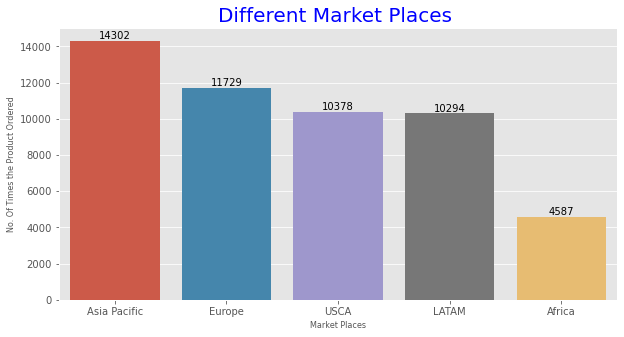

In [15]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Market',data=df,
             order=df['Market'].value_counts(ascending=False).index)
abs_values = df['Market'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);
plt.xlabel("Market Places", fontsize=8)
plt.ylabel("No. Of Times the Product Ordered", fontsize=8)
plt.title("Different Market Places ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

* Asia Pacific has most demanded.

### Which Segment place has most Demand?

Text(0.5, 1.0, 'Different Segment Types ')

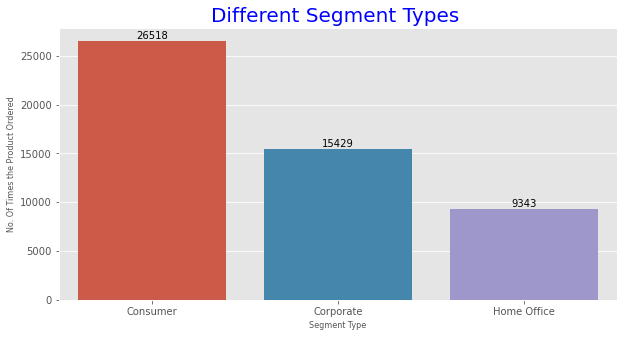

In [16]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Segment',data=df,
             order=df['Segment'].value_counts(ascending=False).index)
abs_values = df['Segment'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);
plt.xlabel("Segment Type", fontsize=8)
plt.ylabel("No. Of Times the Product Ordered", fontsize=8)
plt.title("Different Segment Types ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

Demand of Consumers Product is High in Market.

### Sales by Segment

In [17]:
# user defined function to add value labels
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]/2), ha='center', fontsize=10)

Text(0.5, 1.0, 'Sales w.r.t Segment Types ')

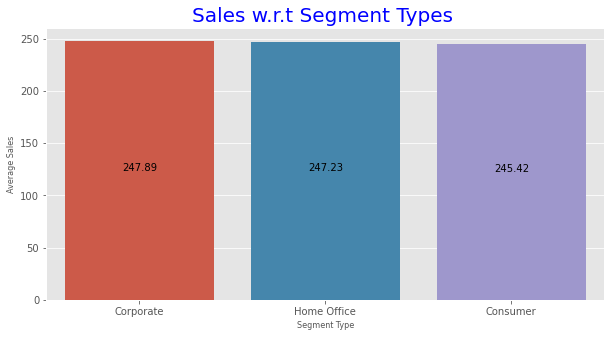

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Segment', y='Sales', data=df, ci=None,
           order=df.groupby('Segment').Sales.mean().sort_values(ascending=False).index)
a=df.groupby('Segment').Sales.mean().sort_values(ascending=False).index
b=df.groupby('Segment').Sales.mean().sort_values(ascending=False).values.round(2)
add_value_label(a,b);

plt.xlabel("Segment Type", fontsize=8)
plt.ylabel("Average Sales", fontsize=8)
plt.title("Sales w.r.t Segment Types ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

Corporate Segment has Highest Average Sales.

### Profit by Segment

Text(0.5, 1.0, 'Profit w.r.t Segment Types ')

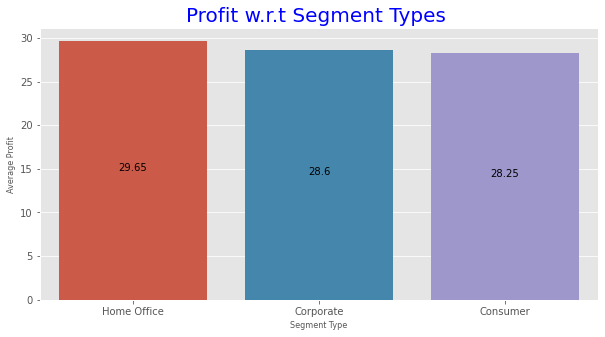

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='Segment', y='Profit', data=df, ci=None,
           order=df.groupby('Segment').Profit.mean().sort_values(ascending=False).index)
a=df.groupby('Segment').Profit.mean().sort_values(ascending=False).index
b=df.groupby('Segment').Profit.mean().sort_values(ascending=False).values.round(2)
add_value_label(a,b);

plt.xlabel("Segment Type", fontsize=8)
plt.ylabel("Average Profit", fontsize=8)
plt.title("Profit w.r.t Segment Types ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

Home Office segment has Highest Average Profit.

### Sales by Market

Text(0.5, 1.0, 'Sales w.r.t Market Places ')

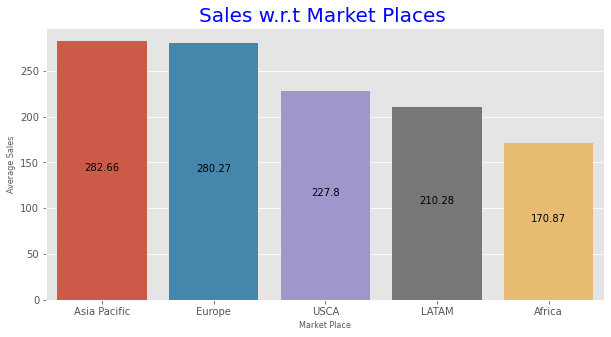

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='Market', y='Sales', data=df, ci=None,
           order=df.groupby('Market').Sales.mean().sort_values(ascending=False).index)
a=df.groupby('Market').Sales.mean().sort_values(ascending=False).index
b=df.groupby('Market').Sales.mean().sort_values(ascending=False).values.round(2)
add_value_label(a,b);

plt.xlabel("Market Place", fontsize=8)
plt.ylabel("Average Sales", fontsize=8)
plt.title("Sales w.r.t Market Places ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

Asian Pacific has Highest Average Sales.

### Profit by Segment

Text(0.5, 1.0, 'Profit w.r.t Market Place ')

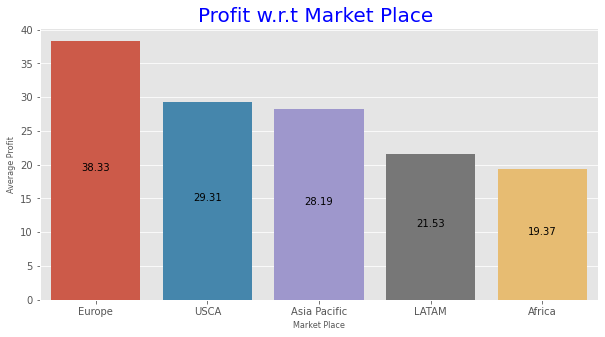

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='Market', y='Profit', data=df, ci=None,
           order=df.groupby('Market').Profit.mean().sort_values(ascending=False).index)
a=df.groupby('Market').Profit.mean().sort_values(ascending=False).index
b=df.groupby('Market').Profit.mean().sort_values(ascending=False).values.round(2)
add_value_label(a,b);

plt.xlabel("Market Place", fontsize=8)
plt.ylabel("Average Profit", fontsize=8)
plt.title("Profit w.r.t Market Place ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

Europe Region has highest average Profit.

### Sales in Market places under different Categories

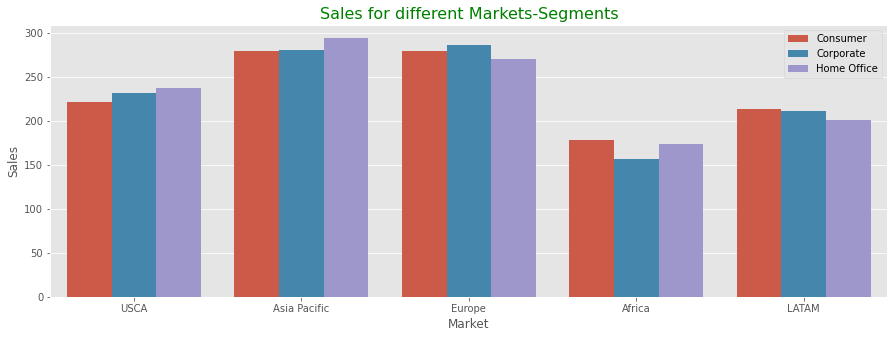

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=df, ci=None)
plt.title('Sales for different Markets-Segments', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend();

### Sales in Segment under different Market Places

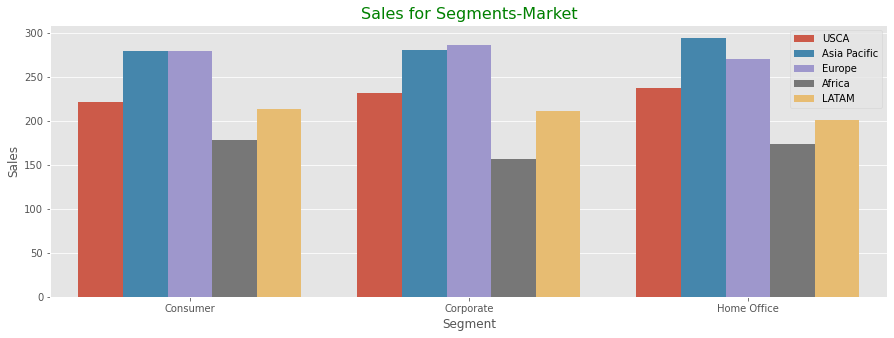

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x='Segment', y= 'Sales', hue='Market', data=df, ci=None)
plt.title('Sales for Segments-Market', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend();

### Profit in Market places under diffrent Categories

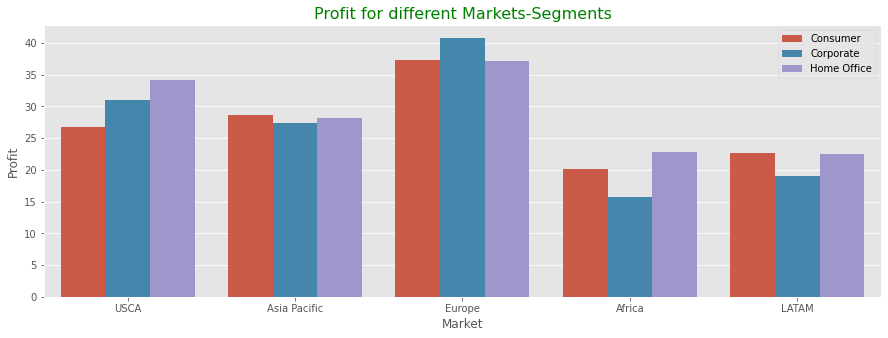

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=df, ci=None)
plt.title('Profit for different Markets-Segments', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend();

### Profit in Segment under diffrent Market Places

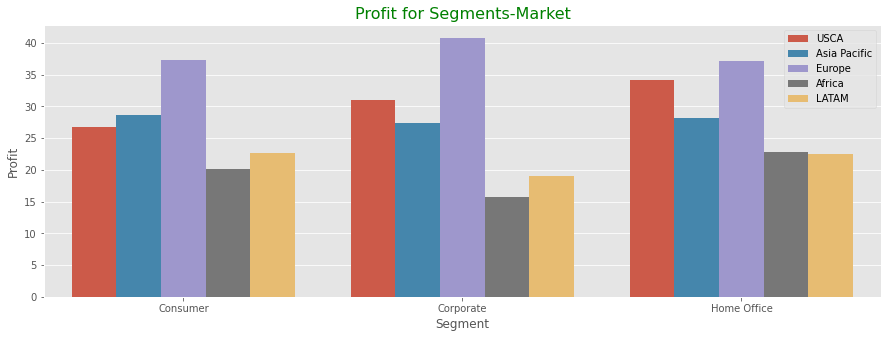

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x='Segment', y= 'Profit', hue='Market', data=df, ci=None)
plt.title('Profit for Segments-Market', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend();

#### Concatenate the Market and Segment column to get the Market Segment data

In [26]:
df['Market_Segment'] = df['Market']+'-'+df['Segment']
df.drop(['Segment', 'Market'], axis = 1, inplace = True)
df.head()

,Order Date,Sales,Profit,Market_Segment
0,2014-11,221.980,62.1544,USCA-Consumer
1,2014-02,3709.395,-288.7650,Asia Pacific-Corporate
2,2014-10,5175.171,919.9710,Asia Pacific-Consumer
3,2014-01,2892.510,-96.5400,Europe-Home Office
4,2014-11,2832.960,311.5200,Africa-Consumer


### Sales by Segment & Market

Text(0.5, 1.0, 'Sales w.r.t Market Place & Segment ')

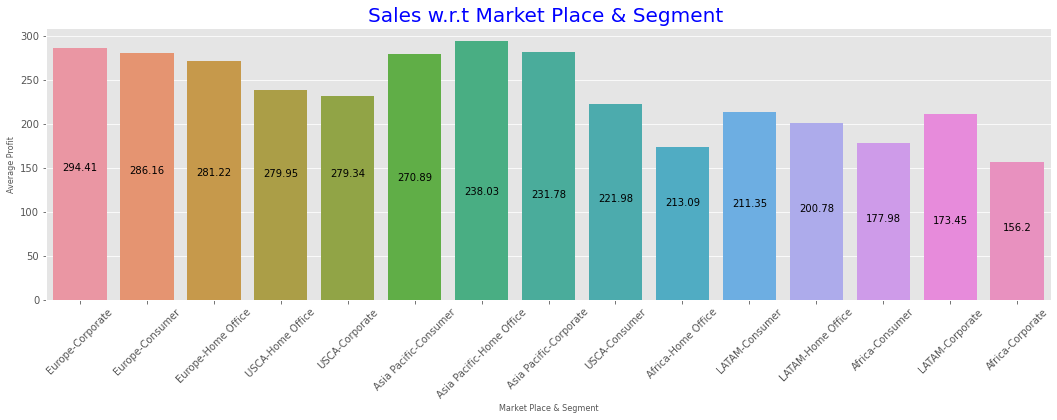

In [27]:
plt.figure(figsize=(18,5))
sns.barplot(x='Market_Segment', y='Sales', data=df, ci=None,
           order=df.groupby('Market_Segment').Profit.mean().sort_values(ascending=False).index)
a=df.groupby('Market_Segment').Sales.mean().sort_values(ascending=False).index
b=df.groupby('Market_Segment').Sales.mean().sort_values(ascending=False).values.round(2)
add_value_label(a,b);

plt.xlabel("Market Place & Segment", fontsize=8)
plt.xticks(rotation=45)
plt.ylabel("Average Profit", fontsize=8)
plt.title("Sales w.r.t Market Place & Segment ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

Market Place Europe has Highest Average Sales in Corporate Segment.

### Profit by Segment & Market

Text(0.5, 1.0, 'Profit w.r.t Market Place & Segment ')

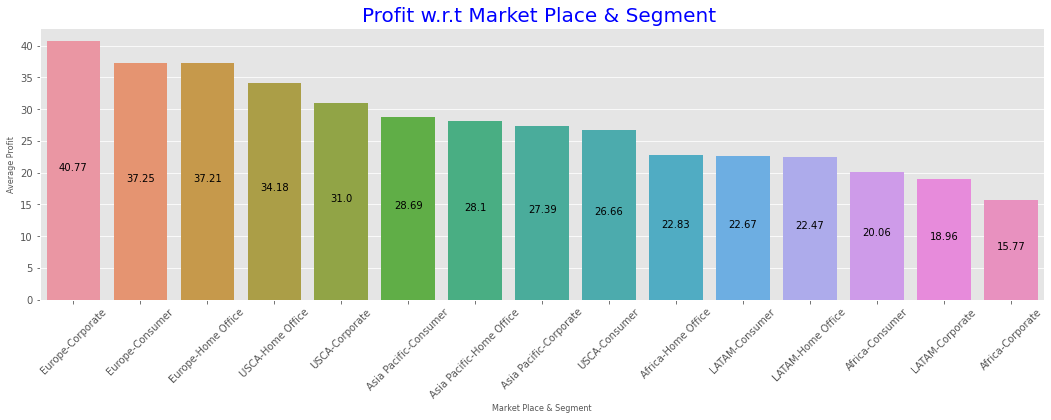

In [28]:
plt.figure(figsize=(18,5))
sns.barplot(x='Market_Segment', y='Profit', data=df, ci=None,
           order=df.groupby('Market_Segment').Profit.mean().sort_values(ascending=False).index)
a=df.groupby('Market_Segment').Profit.mean().sort_values(ascending=False).index
b=df.groupby('Market_Segment').Profit.mean().sort_values(ascending=False).values.round(2)
add_value_label(a,b);

plt.xlabel("Market Place & Segment", fontsize=8)
plt.xticks(rotation=45)
plt.ylabel("Average Profit", fontsize=8)
plt.title("Profit w.r.t Market Place & Segment ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

Market Place Europe has Highest Average Profit in Corporate Segment.

#### Displaying the time series data consisting of order, sales, profit for market segments

In [29]:
df.groupby(['Market_Segment', 'Order Date']).sum()

Sales     Profit
Market_Segment   Order Date                      
Africa-Consumer  2012-01      7909.083   475.6830
                 2012-02      4886.136  1441.9260
                 2012-03      2656.830   322.1400
                 2012-04      4004.082   292.1220
                 2012-05      5043.654   120.2040
...                                ...        ...
USCA-Home Office 2015-08      7314.906  1697.4176
                 2015-09     20737.468  2312.5833
                 2015-10     29871.893  4031.1877
                 2015-11     21436.828  2390.5164
                 2015-12     16135.645  3998.0265

[720 rows x 2 columns]

#### create a Pivot Table to show the data by Order Date as index and each of the 21 market segments as columns with total profit values.

In [30]:
data = pd.pivot_table(data = df, index = "Order Date", columns = "Market_Segment", values = "Profit", aggfunc=sum)
data


Market_Segment,Africa-Consumer,Africa-Corporate,Africa-Home Office,Asia Pacific-Consumer,Asia Pacific-Corporate,Asia Pacific-Home Office,Europe-Consumer,Europe-Corporate,Europe-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,USCA-Consumer,USCA-Corporate,USCA-Home Office
Order Date,,,,,,,,,,,,,,,
2012-01,475.683,219.096,856.710,-1162.5915,564.8418,202.8423,-791.3190,1504.2015,975.3600,1976.98976,1150.88400,-106.48800,765.9267,306.6145,1383.0499
2012-02,1441.926,-519.264,820.302,1545.7371,4741.9974,-307.6428,-822.6780,4317.6585,101.4570,902.37752,721.25420,300.19936,791.1401,307.2995,-18.7030
2012-03,322.140,-558.003,67.320,4044.8529,1060.6806,1063.2462,3008.6010,237.2610,291.5550,2598.55924,-173.74088,285.46400,685.6373,338.7875,-182.7339
2012-04,292.122,776.691,500.136,3521.6376,120.6465,51.1530,2368.3185,1412.6145,225.2880,374.34148,472.07200,-421.73440,1189.8021,1387.6468,940.3767
2012-05,120.204,241.338,34.926,3314.4903,2057.2572,-174.5550,1057.4805,2316.5520,736.0320,1002.34724,-355.94444,-99.47600,1015.2909,2142.3861,1235.7535
2012-06,-1300.839,-324.162,-774.801,3662.3436,1740.5094,507.5631,4820.9715,3763.5090,1189.1730,1039.27972,2567.90696,503.05764,3255.8626,103.5433,186.6808
2012-07,511.992,26.172,-506.562,-1159.1568,737.5047,-23.2998,891.9300,919.1100,521.4570,1906.45620,118.05032,363.28400,-2173.0854,1819.3474,87.4072
2012-08,344.973,1095.984,1090.200,1537.7121,3716.3181,891.2976,7212.1635,2058.2670,248.0520,1950.49372,228.44028,661.27592,2280.4592,2224.4090,912.9520
2012-09,-84.393,1356.486,1345.740,4234.2159,1121.4135,1114.5975,7039.6785,5266.7925,3110.2410,1675.66132,304.83100,179.78944,8360.1901,-944.8010,964.0801


In [31]:
data.shape[0]

48

Data Contains 48 Observation.

## Time Series Forecasting

#### Split our data into Train & Test

In [32]:
# train set contains 42 observation & test set contains 6.
train=data[:42]
test=data[42:]
print(train.shape)
print(test.shape)

(42, 15)
(6, 15)


##### mean of train set

In [33]:
train_mean=np.mean(train)
train_mean

Market_Segment
Africa-Consumer              798.898929
Africa-Corporate             426.027286
Africa-Home Office           333.002143
Asia Pacific-Consumer       3899.871300
Asia Pacific-Corporate      2299.569386
Asia Pacific-Home Office    1204.110100
Europe-Consumer             4366.554107
Europe-Corporate            2681.697107
Europe-Home Office          1395.701357
LATAM-Consumer              2252.677529
LATAM-Corporate             1075.994223
LATAM-Home Office            788.531853
USCA-Consumer               2800.936967
USCA-Corporate              1927.153607
USCA-Home Office            1128.229567
dtype: float64

##### standard deviation of train set

In [34]:
train_std=np.std(train)
train_std

Market_Segment
Africa-Consumer             1141.732088
Africa-Corporate             733.865689
Africa-Home Office           664.257095
Asia Pacific-Consumer       2570.359977
Asia Pacific-Corporate      1759.690664
Asia Pacific-Home Office    1475.465465
Europe-Consumer             2495.048219
Europe-Corporate            1782.182124
Europe-Home Office          1307.598024
LATAM-Consumer              1537.795460
LATAM-Corporate              947.130613
LATAM-Home Office           1059.994009
USCA-Consumer               2847.816534
USCA-Corporate              1899.278587
USCA-Home Office            1276.103290
dtype: float64

##### create a dataframe of these above columns and create new column name Coeffience of variation=standard deviation/mean

In [35]:
data_CoV=pd.DataFrame({'Mean':train_mean, 'Std_Dev':train_std, 'Coeff_of_Var':(train_std/train_mean)})
data_CoV

,Mean,Std_Dev,Coeff_of_Var
Market_Segment,,,
Africa-Consumer,798.898929,1141.732088,1.429132
Africa-Corporate,426.027286,733.865689,1.722579
Africa-Home Office,333.002143,664.257095,1.994753
Asia Pacific-Consumer,3899.871300,2570.359977,0.659088
Asia Pacific-Corporate,2299.569386,1759.690664,0.765226
Asia Pacific-Home Office,1204.110100,1475.465465,1.225358
Europe-Consumer,4366.554107,2495.048219,0.571400
Europe-Corporate,2681.697107,1782.182124,0.664572
Europe-Home Office,1395.701357,1307.598024,0.936875


**We need to find the market segment for which value of Coefficient of variation is least for profit. This is because, less standard deviation means less variation in profit, which means more consistent are the profit figures for that region over the given period. We calculate the Coefficient of Variation for each of the 21 market segments for 42 months(train data) to decide which market segment is consistently profitable.**

##### which market segment has least variation in coefficient

In [36]:
data_CoV.Coeff_of_Var.sort_values()

Market_Segment
Europe-Consumer             0.571400
Asia Pacific-Consumer       0.659088
Europe-Corporate            0.664572
LATAM-Consumer              0.682652
Asia Pacific-Corporate      0.765226
LATAM-Corporate             0.880238
Europe-Home Office          0.936875
USCA-Corporate              0.985536
USCA-Consumer               1.016737
USCA-Home Office            1.131067
Asia Pacific-Home Office    1.225358
LATAM-Home Office           1.344263
Africa-Consumer             1.429132
Africa-Corporate            1.722579
Africa-Home Office          1.994753
Name: Coeff_of_Var, dtype: float64

Europe-Consumer is the market segment with least Coefficient of Variation. It means profit figures for this market segment have been consistent over the train set period. Hence we choose this market segment to further calculate and predict the Sales Values.

##### Filter the main data frame such for Europe-Consumer market segment

In [37]:
data_europe_cons = df[df['Market_Segment'] == 'Europe-Consumer']
data_europe_cons

,Order Date,Sales,Profit,Market_Segment
27,2012-03,3069.738,1364.238,Europe-Consumer
38,2015-01,4141.020,1697.670,Europe-Consumer
43,2013-12,5785.020,404.730,Europe-Consumer
44,2012-09,3018.624,377.244,Europe-Consumer
66,2015-12,2188.050,1050.150,Europe-Consumer
...,...,...,...,...
51234,2013-01,59.100,0.000,Europe-Consumer
51254,2015-12,53.730,6.420,Europe-Consumer
51258,2015-05,27.300,3.780,Europe-Consumer
51269,2012-05,200.400,12.000,Europe-Consumer


##### Group the data by Order Date for sum of Sales

In [38]:
data1=data_europe_cons.groupby(['Order Date'])['Sales'].sum()
data1

Order Date
2012-01     8007.7710
2012-02    12394.9020
2012-03    14697.3510
2012-04    12122.1585
2012-05    19055.5605
2012-06    26306.4915
2012-07    10558.8900
2012-08    45974.2635
2012-09    45767.4285
2012-10    19004.2770
2012-11    35798.4300
2012-12    34382.3520
2013-01    20088.8580
2013-02    15733.3215
2013-03    37505.7480
2013-04    20313.0780
2013-05    31055.6400
2013-06    43912.3860
2013-07    25464.9405
2013-08    58437.2955
2013-09    51876.6840
2013-10    17944.9050
2013-11    36782.2260
2013-12    56588.5680
2014-01    32728.3830
2014-02    21690.0930
2014-03    21971.0550
2014-04    18553.4895
2014-05    31582.9995
2014-06    54812.1285
2014-07    29689.0440
2014-08    45455.7750
2014-09    42203.1630
2014-10    22384.8990
2014-11    55197.3360
2014-12    48780.5520
2015-01    38329.1730
2015-02    26736.0570
2015-03    23863.9320
2015-04    36941.5785
2015-05    39926.9655
2015-06    58563.3330
2015-07    36653.0580
2015-08    73285.4565
2015-09    61244.1975

##### convert above to dataframe

In [39]:
data1=pd.DataFrame(data1)
data1

,Sales
Order Date,
2012-01,8007.7710
2012-02,12394.9020
2012-03,14697.3510
2012-04,12122.1585
2012-05,19055.5605
2012-06,26306.4915
2012-07,10558.8900
2012-08,45974.2635
2012-09,45767.4285


In [40]:
data1.index = data1.index.to_timestamp()
data1.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

In [41]:
data1.index.dtype

dtype('<M8[ns]')

#### Plot Time Series

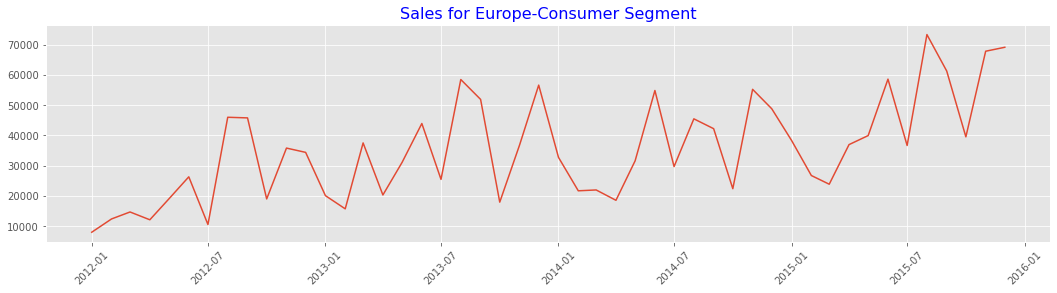

In [42]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Sales')
plt.title('Sales for Europe-Consumer Segment', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation = 45)
plt.show();

From above Time series plot, both Trend and Seasonality are clearly observed.

### Time Series Decomposition

#### Additive Seasonal Decomposition

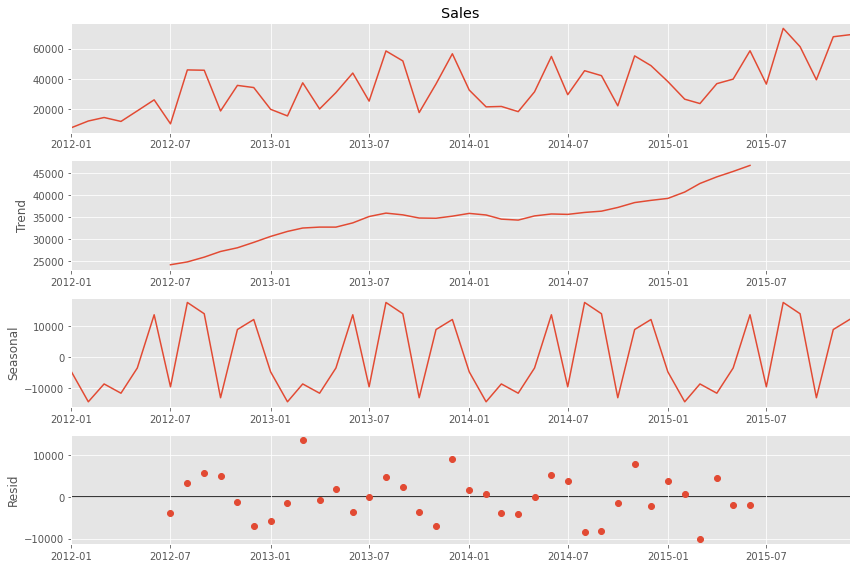

In [43]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show();

#### Multiplicative Seasonal Decomposition

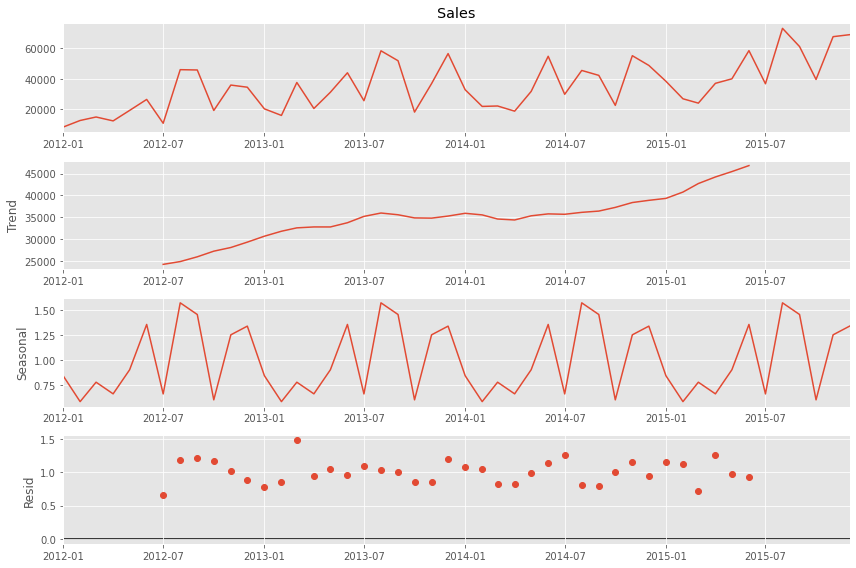

In [44]:
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show();

We can clearly see the trend & seasonality.

**Our Data Contains Trend & Seasonality so "Holtz Winnter" & "SARIMA" models can be applied.**

#### Train test Split

In [45]:
data1.shape[0]

48

We have total 48 rows, set 42 for training & rest 6 are for testing.

In [46]:
train=data1[:42]
test=data1[42:]

In [47]:
train.head()

,Sales
Order Date,
2012-01-01,8007.7710
2012-02-01,12394.9020
2012-03-01,14697.3510
2012-04-01,12122.1585
2012-05-01,19055.5605


In [48]:
test.head()

,Sales
Order Date,
2015-07-01,36653.0580
2015-08-01,73285.4565
2015-09-01,61244.1975
2015-10-01,39510.7575
2015-11-01,67782.1860


## Simple  Methods

### Naive Method
* The Naive method simply carries forward the last observation.

In [49]:
train_len=len(train)
train_len

42

In [50]:
naive=test.copy()
naive['naive_forecast']=train['Sales'][train_len-1] # 42 is len(train set)
naive

,Sales,naive_forecast
Order Date,,
2015-07-01,36653.0580,58563.333
2015-08-01,73285.4565,58563.333
2015-09-01,61244.1975,58563.333
2015-10-01,39510.7575,58563.333
2015-11-01,67782.1860,58563.333
2015-12-01,69089.8935,58563.333


#### Plot train test & naive forecast

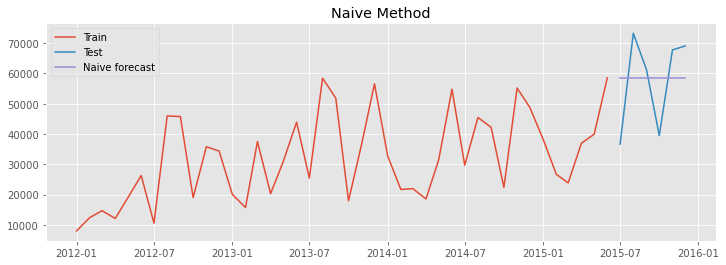

In [51]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(naive['naive_forecast'], label='Naive forecast')
plt.legend()
plt.title('Naive Method');

In [52]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88


RMSE is too high.

### Simple average method:
* Simple average uses average of all observations for forecasting.

In [53]:
avg=test.copy()
avg['simp_avg_forecast']=train['Sales'].mean()
avg

,Sales,simp_avg_forecast
Order Date,,
2015-07-01,36653.0580,32123.41625
2015-08-01,73285.4565,32123.41625
2015-09-01,61244.1975,32123.41625
2015-10-01,39510.7575,32123.41625
2015-11-01,67782.1860,32123.41625
2015-12-01,69089.8935,32123.41625


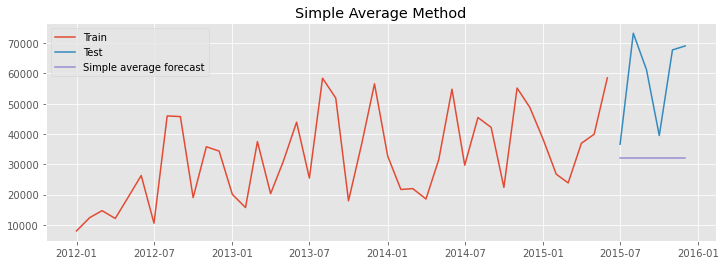

In [54]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(avg['simp_avg_forecast'], label='Simple average forecast')
plt.legend()
plt.title('Simple Average Method');

In [55]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], avg['simp_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-avg['simp_avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15


RMSE is higher than Naive Method.

### Simple moving average method:
* Simple Moving average method uses moving averages for forecasting.

In [56]:
sma = data1.copy()
sma['sma_forecast'] = data1['Sales'].rolling(window=12).mean()
sma['sma_forecast'][42:] = sma['sma_forecast'][42-1]
sma

,Sales,sma_forecast
Order Date,,
2012-01-01,8007.7710,NaN
2012-02-01,12394.9020,NaN
2012-03-01,14697.3510,NaN
2012-04-01,12122.1585,NaN
2012-05-01,19055.5605,NaN
2012-06-01,26306.4915,NaN
2012-07-01,10558.8900,NaN
2012-08-01,45974.2635,NaN
2012-09-01,45767.4285,NaN


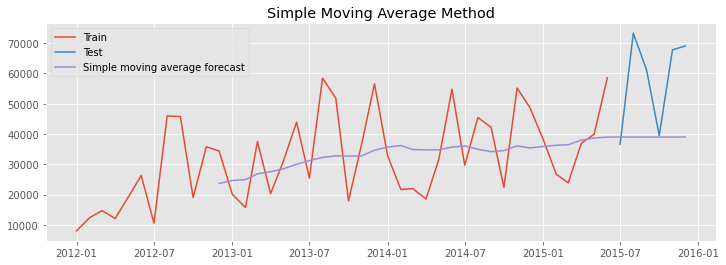

In [57]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(sma['sma_forecast'], label='Simple moving average forecast')
plt.legend()
plt.title('Simple Moving Average Method');

In [58]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], sma['sma_forecast'][42:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-sma['sma_forecast'][42:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46


RMSE is better than Simple average but it is worst as compare to Naive method.

## Exponential Smoothing Techniques

### Simple exponential smoothing
* In the Simple exponential smoothing technique, the recent observations are given more weight than the past ones.
* It captures level in the data but doesn't capture trend or seasonality.

In [59]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
simp_expo= test.copy()
simp_expo['simp_expo_forecast'] = model_fit.forecast(len(test))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


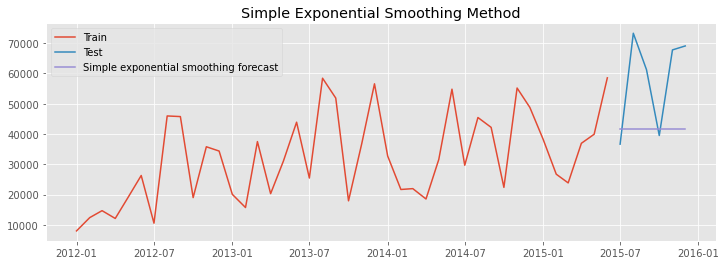

In [60]:
# Plot train, test, forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(simp_expo['simp_expo_forecast'], label='Simple exponential smoothing forecast')
plt.legend()
plt.title('Simple Exponential Smoothing Method');

In [61]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], simp_expo['simp_expo_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-simp_expo['simp_expo_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75


RMSE is better than SMA, SM but not good as compare to Naive method.

### Holt’s method with trend:
* The Holt’s method on the other hand can capture level and trend but not seasonality.

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
holt_trend = test.copy()
holt_trend['holt_trend_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.16999999999999998, 'smoothing_trend': 0.16999999999999998, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 5004.845099999997, 'initial_trend': 2978.920772727274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


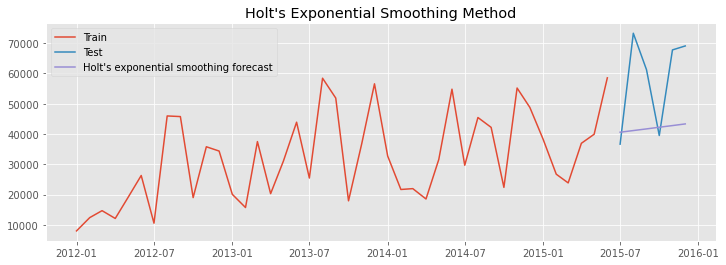

In [63]:
# Plot train, test, forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(holt_trend['holt_trend_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend()
plt.title('Holt\'s Exponential Smoothing Method');

In [64]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], holt_trend['holt_trend_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-holt_trend['holt_trend_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75
0,Holt's exponential smoothing method,21312.29,27.93


RMSE is better than SA, SMA, SE, but worst as compare to Naive.

### Holt Winters' additive method with trend and seasonality
* The Holt Winter’s method can capture all level, trend and seasonality.

In [65]:
hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
hwa['hwa_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.11107142857142857, 'smoothing_trend': 0.11107142857142857, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 22974.375762499985, 'initial_trend': 1043.0521613636383, 'initial_seasons': array([ -7348.68839063, -15433.34467188,  -4321.59304688, -14622.88489062,
        -3211.42239062,  14127.40873437, -12163.78176562,  21321.41992188,
        17592.51135937, -13040.47545313,   4380.28717188,  12720.56342187]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


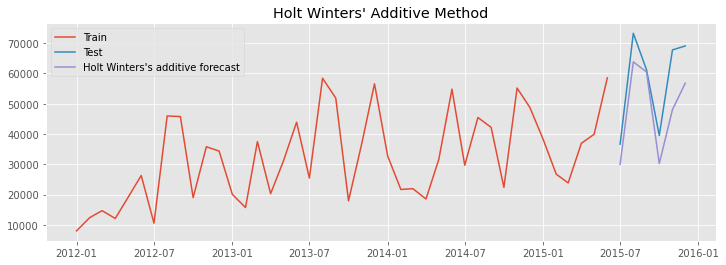

In [66]:
# Plot train, test, forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(hwa['hwa_forecast'], label='Holt Winters\'s additive forecast')
plt.legend()
plt.title('Holt Winters\' Additive Method');

In [67]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-hwa['hwa_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75
0,Holt's exponential smoothing method,21312.29,27.93
0,Holt Winters' additive method,11259.73,17.11


RMSE is better than all other methods.

### Holt Winter's multiplicative method with trend and seasonality

In [68]:
hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
hwm['hwm_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.11107142857142857, 'smoothing_trend': 0.11107142857142857, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 22974.375762499985, 'initial_trend': 1043.0521613636383, 'initial_seasons': array([0.76820823, 0.54182951, 0.87597482, 0.56842857, 0.90282303,
       1.38925985, 0.56870011, 1.70401234, 1.58045734, 0.59474961,
       1.14366471, 1.36189187]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


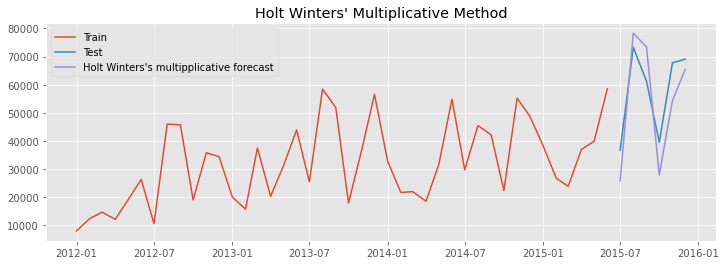

In [69]:
# Plot train, test, forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(hwm['hwm_forecast'], label='Holt Winters\'s multipplicative forecast')
plt.legend()
plt.title('Holt Winters\' Multiplicative Method');

In [70]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-hwm['hwm_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75
0,Holt's exponential smoothing method,21312.29,27.93
0,Holt Winters' additive method,11259.73,17.11
0,Holt Winters' multiplicative method,10152.73,18.44


RMSE is better than all other methods except Holt's winter's additive method.

**Here We conclude from above table that Holt Winters' additive method is preffered to forecast beause the RMSE and MAPE values for this method are lower as compared to other methods. This method is very well able to capture the trend and seasonality in the data.**

## Auto Regressive Methods
* In autoregressive methods, regression technique is used for forecasting the the future observations, using a linear combination of past observations. But for this the time series should follow 2 assumptions :
1. Stationarity: For a time series to be stationary, the mean, variance and co-variance should be constant.
2. Autocorrelation: Autocorrelation helps to know how a variable is influenced by its own lagged values.

**There are 2 tests to confirm stationarity, as follows:**
1. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test :
  * Null Hypothesis (H 0 ): The series is stationary : p−value>0.05
  * Alternate Hypothesis (H a ): The series is not stationary : p−value≤0.05

2. Augmented Dickey-Fuller (ADF) Test:
  * Null Hypothesis (H0 ): The series is not stationary : p−value>0.05
  * Alternate Hypothesis (Ha ): The series is stationary : p−value≤0.05

We perform these tests on our time series data and conclude that the time series is not stationary. In order to make it stationary, we need to perform Differencing(making mean constant) and Transformation(making variance constant).

#### Check whether the time series is stationary
1. Augmented Dickey-Fuller (ADF) test

In [71]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: 0.160054
Critical Values @ 0.05: -2.94
p-value: 0.969930


p-value is not less than 0.05 hence series is not stationary.

2.Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [72]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.847890
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


p-value is less than 0.05 hence the series is not stationary.

**Series is not stationary, to make it stationary perform transformation & differencing.**

#### Box Cox transformation to make variance constant.

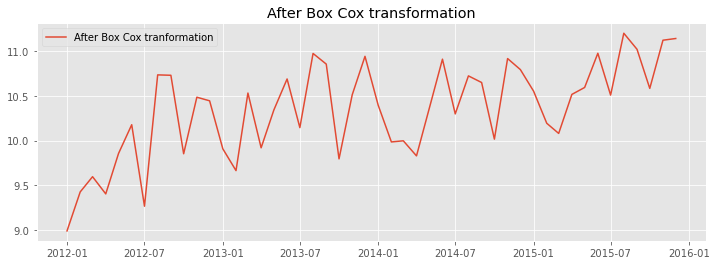

In [73]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Sales'], lmbda=0), index = data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend()
plt.title('After Box Cox transformation');

#### Use Differencing to remove Trend

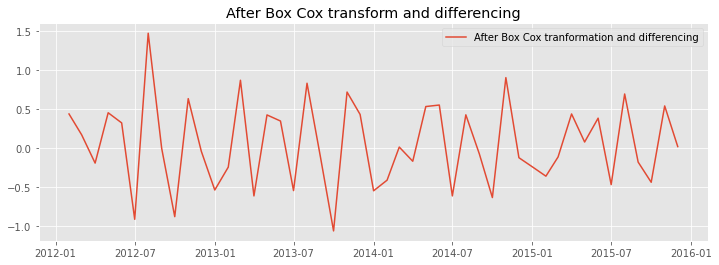

In [74]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index).dropna()
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend()
plt.title('After Box Cox transform and differencing');

In [75]:
data_boxcox_diff

Order Date
2012-02-01    0.436873
2012-03-01    0.170382
2012-04-01   -0.192632
2012-05-01    0.452324
2012-06-01    0.322457
2012-07-01   -0.912848
2012-08-01    1.471114
2012-09-01   -0.004509
2012-10-01   -0.878909
2012-11-01    0.633240
2012-12-01   -0.040361
2013-01-01   -0.537378
2013-02-01   -0.244384
2013-03-01    0.868713
2013-04-01   -0.613229
2013-05-01    0.424516
2013-06-01    0.346416
2013-07-01   -0.544894
2013-08-01    0.830652
2013-09-01   -0.119085
2013-10-01   -1.061563
2013-11-01    0.717709
2013-12-01    0.430792
2014-01-01   -0.547564
2014-02-01   -0.411387
2014-03-01    0.012870
2014-04-01   -0.169068
2014-05-01    0.531961
2014-06-01    0.551293
2014-07-01   -0.613133
2014-08-01    0.425962
2014-09-01   -0.074245
2014-10-01   -0.634109
2014-11-01    0.902528
2014-12-01   -0.123583
2015-01-01   -0.241120
2015-02-01   -0.360198
2015-03-01   -0.113645
2015-04-01    0.436970
2015-05-01    0.077714
2015-06-01    0.383057
2015-07-01   -0.468612
2015-08-01    0.692865


##### Now Check whether Series is stationary or not.

In [76]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -5.577281
Critical Values @ 0.05: -2.95
p-value: 0.000001


P-value is very much less than 0.05. Hence Series is **Stationary**

In [77]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.259185
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


P-value is greater than 0.05, hence series is **Stationary**

##### Train Test Split


In [78]:
train_bct=data_boxcox_diff[:41]
test_bct=data_boxcox_diff[41:]

### Auto Regression(AR) method
* This method uses linear regression for predicting the future observation using one or more past observations.

In [79]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train,order=(1,0,0))
model_fit = model.fit()
forcast_AR=model_fit.predict(start=len(train), end=len(data1)-1)
forcast_AR

2015-07-01    39255.516572
2015-08-01    34047.282179
2015-09-01    32642.374193
2015-10-01    32263.403836
2015-11-01    32161.177546
2015-12-01    32133.602264
Freq: MS, Name: predicted_mean, dtype: float64

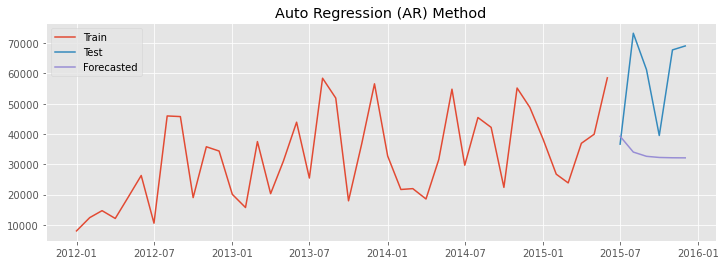

In [80]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forcast_AR, label="Forecasted")
plt.legend()
plt.title("Auto Regression (AR) Method");

In [81]:
from sklearn.metrics import mean_absolute_percentage_error
rmse=np.sqrt(mean_squared_error(test,forcast_AR)).round(2)
mape=mean_absolute_percentage_error(test,forcast_AR).round(2)*100

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75
0,Holt's exponential smoothing method,21312.29,27.93
0,Holt Winters' additive method,11259.73,17.11
0,Holt Winters' multiplicative method,10152.73,18.44
0,Autoregressive (AR) method,29016.14,39.00


This method is not Good.

### Moving average method (MA)
* Future values are forecasted using past forecast errors in a regression-like model.

In [82]:
model=sm.tsa.arima.ARIMA(train,order=(0,0,1))
model_fit = model.fit()
forcast_MA=model_fit.predict(start=len(train), end=len(data1)-1)
forcast_MA

2015-07-01    43859.166679
2015-08-01    32123.416269
2015-09-01    32123.416269
2015-10-01    32123.416269
2015-11-01    32123.416269
2015-12-01    32123.416269
Freq: MS, Name: predicted_mean, dtype: float64

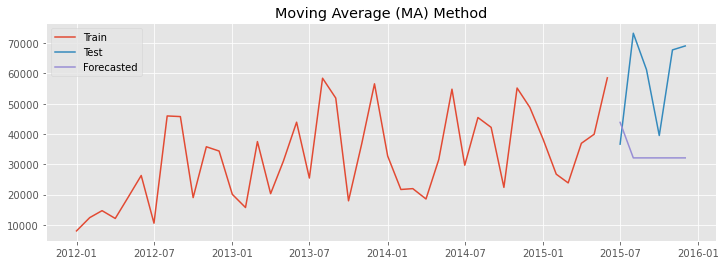

In [83]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forcast_MA, label="Forecasted")
plt.legend()
plt.title("Moving Average (MA) Method");

In [84]:
rmse=np.sqrt(mean_squared_error(test,forcast_MA)).round(2)
mape=mean_absolute_percentage_error(test,forcast_MA).round(2)*100

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75
0,Holt's exponential smoothing method,21312.29,27.93
0,Holt Winters' additive method,11259.73,17.11
0,Holt Winters' multiplicative method,10152.73,18.44
0,Autoregressive (AR) method,29016.14,39.00
0,Moving Average (MA) method,29684.18,41.00


RMSE high among all, this method is not good.

### Auto regression moving average method (ARMA)
* It is a combination of AR and MA models

In [85]:
model=sm.tsa.arima.ARIMA(train,order=(1,0,1))
model_fit = model.fit()
forcast_ARMA=model_fit.predict(start=len(train), end=len(data1)-1)
forcast_ARMA

2015-07-01    43766.987944
2015-08-01    27060.583183
2015-09-01    34324.826627
2015-10-01    31166.203718
2015-11-01    32539.629424
2015-12-01    31942.439375
Freq: MS, Name: predicted_mean, dtype: float64

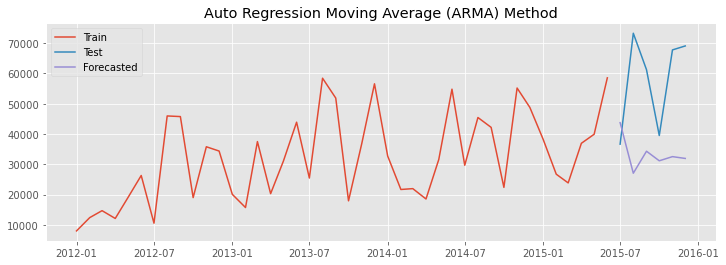

In [86]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forcast_ARMA, label="Forecasted")
plt.legend()
plt.title("Auto Regression Moving Average (ARMA) Method");

In [87]:
rmse=np.sqrt(mean_squared_error(test,forcast_ARMA)).round(2)
mape=mean_absolute_percentage_error(test,forcast_ARMA).round(2)*100

tempResults = pd.DataFrame({'Method':['ARMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75
0,Holt's exponential smoothing method,21312.29,27.93
0,Holt Winters' additive method,11259.73,17.11
0,Holt Winters' multiplicative method,10152.73,18.44
0,Autoregressive (AR) method,29016.14,39.00
0,Moving Average (MA) method,29684.18,41.00
0,ARMA,30560.33,42.00


Model is not Good.

### Auto regressive integrated moving average (ARIMA)
* It is same as ARMA model, just has an additional integrated differencing component in it. 
* Earlier, we applied both the box-cox transformation and differencing to the data, in order to make the time-series data stationary. 
* Here, we are just applying box-cox before building the model and letting the model take care of the differencing i.e. the trend component itself.

In [88]:
model=sm.tsa.arima.ARIMA(train,order=(1,1,1))
model_fit = model.fit()
forcast_ARIMA=model_fit.predict(start=len(train), end=len(data1)-1)
forcast_ARIMA

2015-07-01    42846.608480
2015-08-01    41320.890389
2015-09-01    41172.779649
2015-10-01    41158.401638
2015-11-01    41157.005877
2015-12-01    41156.870382
Freq: MS, Name: predicted_mean, dtype: float64

In [89]:
rmse=np.sqrt(mean_squared_error(test,forcast_ARIMA)).round(2)
rmse

22191.68

* RMSE is high, we can alter the p,d,q values to get better results.

#### Lets Choose right p, d, q values

In [101]:
import itertools
warnings.filterwarnings('ignore')
p=range(0,8)
q=range(0,8)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
len(pdq)

128

In [102]:
rmse=[]
order1=[]
for pdq in pdq:
    try:
        model=sm.tsa.arima.ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train), end=len(data1)-1)
        error=np.sqrt(mean_squared_error(pred,test))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [103]:
order=pd.DataFrame(data=rmse, index=order1, columns=['RMSE'])
order.round()

,RMSE
"(0, 0, 0)",29596.0
"(0, 0, 1)",29684.0
"(0, 0, 2)",31397.0
"(0, 0, 3)",28471.0
"(0, 0, 4)",28701.0
...,...
"(7, 1, 3)",21159.0
"(7, 1, 4)",25096.0
"(7, 1, 5)",23441.0
"(7, 1, 6)",22562.0


In [104]:
pd.pivot_table(order, values='RMSE', index=order.index, aggfunc=min).sort_values(by='RMSE', ascending=True)[:5].round()

,RMSE
"(0, 1, 0)",14507.0
"(1, 1, 0)",14691.0
"(2, 1, 1)",16141.0
"(3, 1, 0)",17418.0
"(3, 1, 1)",17937.0


* RMSE is low when p=0, d=1, q=0, use these paramenters to build ARIMA model.

In [105]:
model=sm.tsa.arima.ARIMA(train,order=(0,1,0))
model_fit = model.fit()
forecast_ARIMA=model_fit.predict(start=len(train), end=len(data1)-1)
forecast_ARIMA

2015-07-01    58563.333
2015-08-01    58563.333
2015-09-01    58563.333
2015-10-01    58563.333
2015-11-01    58563.333
2015-12-01    58563.333
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Auto Regression Integraed Moving Average (ARIMA) Method')

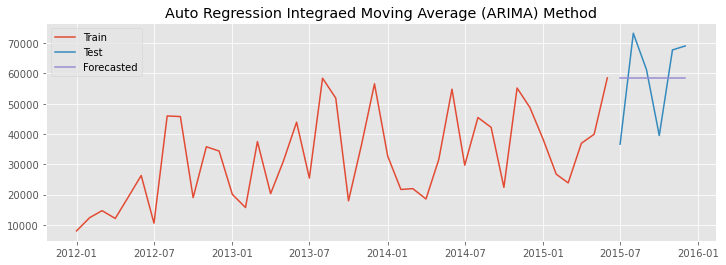

In [106]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast_ARIMA, label="Forecasted")
plt.legend()
plt.title("Auto Regression Integraed Moving Average (ARIMA) Method")

In [96]:
rmse=np.sqrt(mean_squared_error(test,forecast_ARIMA)).round(2)
mape=mean_absolute_percentage_error(test,forecast_ARIMA).round(2)*100

tempResults = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75
0,Holt's exponential smoothing method,21312.29,27.93
0,Holt Winters' additive method,11259.73,17.11
0,Holt Winters' multiplicative method,10152.73,18.44
0,Autoregressive (AR) method,29016.14,39.00
0,Moving Average (MA) method,29684.18,41.00
0,ARMA,30560.33,42.00


Model Performing Better than all other models.

### Seasonal auto regressive integrated moving average (SARIMA)
* SARIMA is same as ARIMA, it just has an additional component of seasonality in it.

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
forcast_SARIMA=model_fit.predict(start=len(train), end=len(data1)-1)
forcast_SARIMA

2015-07-01    37154.123321
2015-08-01    53033.388361
2015-09-01    50160.390966
2015-10-01    31658.641714
2015-11-01    57952.348217
2015-12-01    55058.868335
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Seasonal Auto Regression Integraed Moving Average (SARIMA) Method')

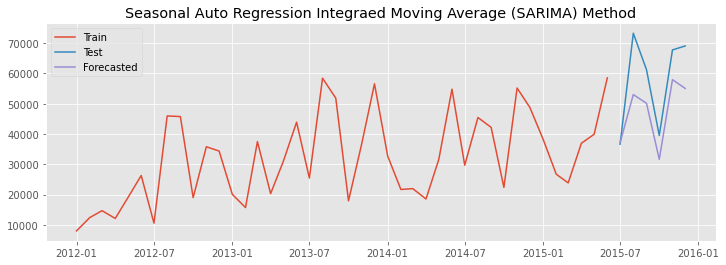

In [98]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forcast_SARIMA, label="Forecasted")
plt.legend()
plt.title("Seasonal Auto Regression Integraed Moving Average (SARIMA) Method")

In [99]:
rmse=np.sqrt(mean_squared_error(test,forcast_SARIMA)).round(2)
mape=mean_absolute_percentage_error(test,forcast_SARIMA).round(2)*100

tempResults = pd.DataFrame({'Method':['SARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,14507.38,26.88
0,Simple average method,29595.87,40.15
0,Simple moving average forecast,23834.58,29.46
0,Simple exponential smoothing forecast,21831.83,28.75
0,Holt's exponential smoothing method,21312.29,27.93
0,Holt Winters' additive method,11259.73,17.11
0,Holt Winters' multiplicative method,10152.73,18.44
0,Autoregressive (AR) method,29016.14,39.00
0,Moving Average (MA) method,29684.18,41.00
0,ARMA,30560.33,42.00


Model is better than all other models.

**Conclusion** : **Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that:**

**1. Holt Winters' additive method.**

**2. Seasonal auto regressive integrated moving average (SARIMA) technique.**

**are the best for forecasting the sales for the data.**

**Both the methods have lower RMSE and MAPE values and are able to capture the trend and seasonality components well in the data.**